**Code reviewer**

¡Hola en esta nueva aventura!

Mi nombre es **Ivan Hernandez** y seré tu revisor de código para este proyecto.

Revisaré todo el cuaderno con preguntas o comentarios dejados atrás. Te animo a responder los comentarios con cualquier duda o solución a la recomendación o problema presentado **(con la celda en color azul)**, esa es la mejor manera de entender y aprender en este nuevo mundo de datos y programación. Seguiré la misma lista de verificación y los mismos pasos en los criterios de evaluación del proyecto.

 Importante, <span style="color:red">por favor no cambies mis comentarios</span>, es una buena forma de seguir tu aprendizaje por mí y otros revisores de código y finalmente, pongo un ejemplo del color del código y su significado.

<div class="alert alert-success">
<h1> Comentarios del revisor </h1>
Excelente trabajo y ejecución
</div>

<div class="alert alert-warning">
<h1> Comentarios del revisor </h1>
Comentario no crítico; si hay menos de tres de tales comentarios, el proyecto puede aceptarse sin su refinamiento.</div>

<div class="alert alert-danger">
<h1> Comentarios del revisor </h1>
Error que debe corregirse, de lo contrario el proyecto no será aceptado.
</div>

<div class="alert alert-info">
<h1> Comentarios del estudiante</h1>
Comentario de ejemplo
</div>

# Proyecto: Anuncios de coches

## Introducción

Este informe presenta los resultados de un análisis de los datos recopilados por Crankshaft List en relación a los anuncios gratuitos de vehículos. Con el objetivo de determinar los factores que influyen en el precio de un vehículo, se ha llevado a cabo un estudio de los datos recopilados durante los últimos años.

El informe comienza con una descripción detallada del preprocesamiento de los datos, que incluye la identificación y estudio de los valores ausentes, la conversión de los datos a los tipos necesarios y la adición de nuevas columnas para el día de la semana, mes, año, años del vehículo y la media de millaje del vehículo por año.

A continuación, se lleva a cabo un análisis exploratorio de los datos que incluye la identificación y eliminación de los valores atípicos, la evaluación de la vida útil de los anuncios y la relación entre el número de anuncios y el precio medio para cada tipo de vehículo. También se analiza cuáles son los factores que tienen un impacto mayor sobre el precio de los vehículos.

Finalmente, se presenta una conclusión general basada en los resultados del análisis. Este informe proporciona una visión detallada de los factores que influyen en el precio de los vehículos y ayudará a Crankshaft List a tomar decisiones informadas en el futuro.

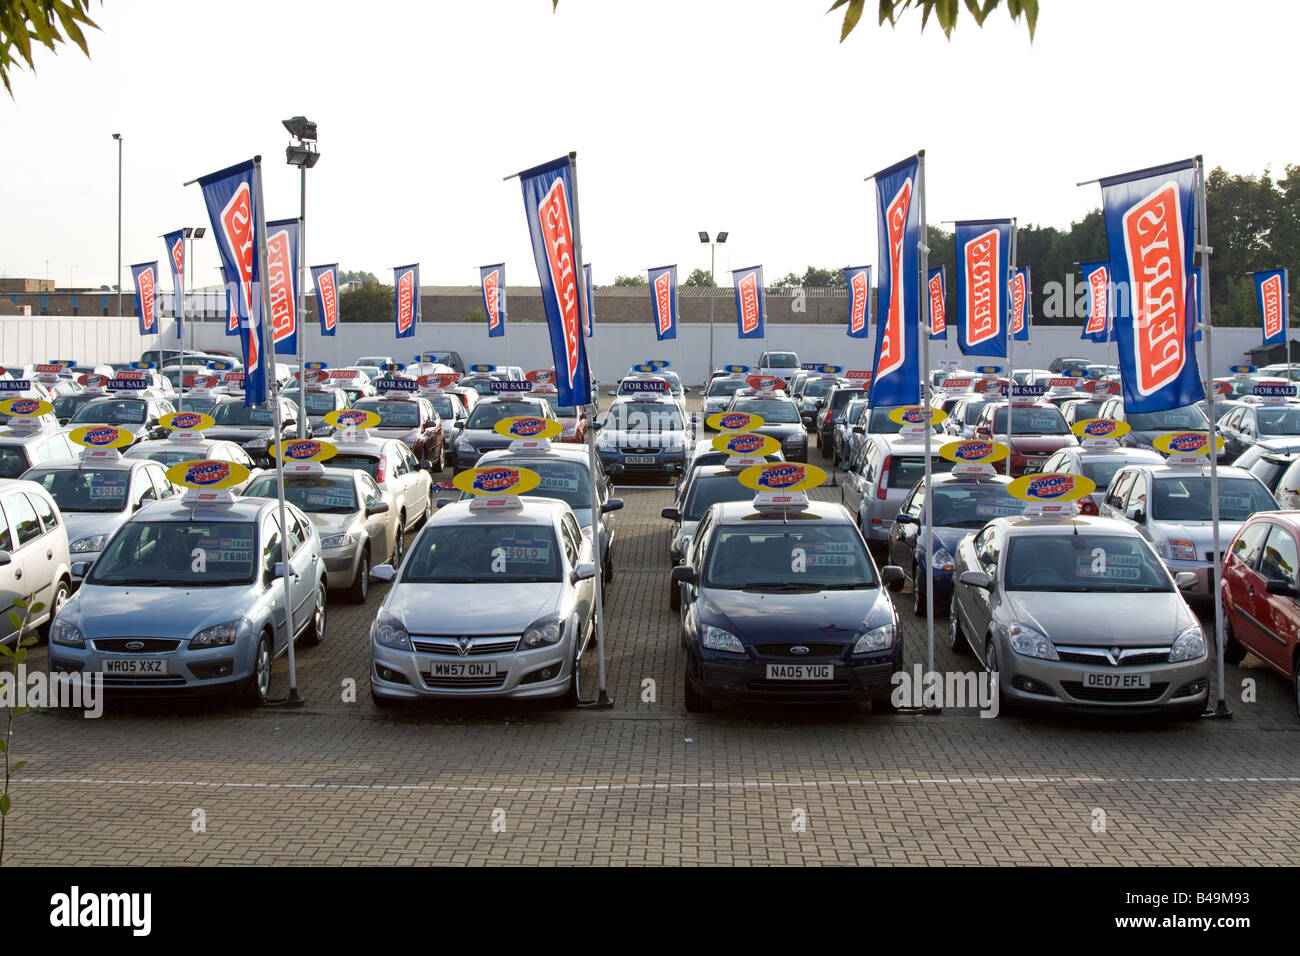

## ¿Como se vende un coche?

Cientos de anuncios gratuitos de vehículos se publican en tu sitio web cada día. Necesitas estudiar los datos recopilados durante los últimos años y determinar qué factores influyen en el precio de un vehículo.

## Inicialización

En este proyecto, es importante cargar las librerías necesarias. En el siguiente código, se están cargando tres librerías, 'pandas', 'numpy' y 'datetime', así como también la librería 'matplotlib.pyplot' para visualización de datos. Es posible que durante el desarrollo del proyecto se requieran librerías adicionales, lo cual es común y se puede actualizar esta sección cuando sea necesario.

In [188]:
# Cargar todas las librerías

import pandas as pd
import numpy as np
import datetime
import matplotlib.pyplot as plt

### Cargar datos

El siguiente código carga los datos del proyecto en un DataFrame para su posterior análisis. 
+ Primero, se intenta cargar el archivo de datos a través del nombre 'moved_vehicles_us.csv'. Si no es posible encontrar el archivo en este directorio, se intentará cargar desde la ruta '/datasets/moved_vehicles_us.csv'. 
+ Una vez cargados los datos, se recomienda revisar la información general para tener una idea de la estructura y el contenido de los datos.

In [189]:
# Carga el archivo de datos en un DataFrame
# Carga los datos

try:
    df = pd.read_csv('moved_vehicles_us.csv')
except:
    df = pd.read_csv('/datasets/vehicles_us.csv') 


### Explorar datos iniciales

El dataset contiene los siguientes campos:
- `price`
- `model_year`
- `model`
- `condition`
- `cylinders`
- `fuel` — gasolina, diesel, etc.
- `odometer` — el millaje del vehículo cuando el anuncio fue publicado
- `transmission`
- `paint_color`
- `is_4wd` — si el vehículo tiene tracción a las 4 ruedas (tipo Booleano)
- `date_posted` — la fecha en la que el anuncio fue publicado
- `days_listed` — desde la publicación hasta que se elimina



El dataset contiene 13 columnas, con un total de 51525 entradas. Los campos incluyen el precio del vehículo price, el año de modelo model_year, el modelo model, el estado de conservación condition, la cantidad de cilindros cylinders, el tipo de combustible fuel, el millaje del vehículo odometer, la transmisión transmission, el color de la pintura paint_color, si el vehículo tiene tracción a las 4 ruedas is_4wd, la fecha en que el anuncio fue publicado date_posted y los días que el anuncio fue publicado antes de ser eliminado days_listed.

In [190]:
# imprime la información general/resumida sobre el DataFrame
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51525 entries, 0 to 51524
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   price         51525 non-null  int64  
 1   model_year    47906 non-null  float64
 2   model         51525 non-null  object 
 3   condition     51525 non-null  object 
 4   cylinders     46265 non-null  float64
 5   fuel          51525 non-null  object 
 6   odometer      43633 non-null  float64
 7   transmission  51525 non-null  object 
 8   type          51525 non-null  object 
 9   paint_color   42258 non-null  object 
 10  is_4wd        25572 non-null  float64
 11  date_posted   51525 non-null  object 
 12  days_listed   51525 non-null  int64  
dtypes: float64(4), int64(2), object(7)
memory usage: 5.1+ MB


In [191]:
# imprimir una muestra de datos

df.head(30)

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed
0,9400,2011.0,bmw x5,good,6.0,gas,145000.0,automatic,SUV,NaN,1.0,2018-06-23,19
1,25500,NaN,ford f-150,good,6.0,gas,88705.0,automatic,pickup,white,1.0,2018-10-19,50
2,5500,2013.0,hyundai sonata,like new,4.0,gas,110000.0,automatic,sedan,red,NaN,2019-02-07,79
3,1500,2003.0,ford f-150,fair,8.0,gas,NaN,automatic,pickup,NaN,NaN,2019-03-22,9
4,14900,2017.0,chrysler 200,excellent,4.0,gas,80903.0,automatic,sedan,black,NaN,2019-04-02,28
5,14990,2014.0,chrysler 300,excellent,6.0,gas,57954.0,automatic,sedan,black,1.0,2018-06-20,15
6,12990,2015.0,toyota camry,excellent,4.0,gas,79212.0,automatic,sedan,white,NaN,2018-12-27,73
7,15990,2013.0,honda pilot,excellent,6.0,gas,109473.0,automatic,SUV,black,1.0,2019-01-07,68
8,11500,2012.0,kia sorento,excellent,4.0,gas,104174.0,automatic,SUV,NaN,1.0,2018-07-16,19
9,9200,2008.0,honda pilot,excellent,NaN,gas,147191.0,automatic,SUV,blue,1.0,2019-02-15,17


> Podemos apreciar que hay valores nulos dentro del conjunto de datos.

In [192]:
df.describe()

,price,model_year,cylinders,odometer,is_4wd,days_listed
count,51525.000000,47906.000000,46265.000000,43633.000000,25572.0,51525.00000
mean,12132.464920,2009.750470,6.125235,115553.461738,1.0,39.55476
std,10040.803015,6.282065,1.660360,65094.611341,0.0,28.20427
min,1.000000,1908.000000,3.000000,0.000000,1.0,0.00000
25%,5000.000000,2006.000000,4.000000,70000.000000,1.0,19.00000
50%,9000.000000,2011.000000,6.000000,113000.000000,1.0,33.00000
75%,16839.000000,2014.000000,8.000000,155000.000000,1.0,53.00000
max,375000.000000,2019.000000,12.000000,990000.000000,1.0,271.00000


> Tambien podemos apreciar que existen datos atipicos que podrian perjudicar el analisis.


In [193]:
df['cylinders'].unique()

array([ 6.,  4.,  8., nan,  5., 10.,  3., 12.])

__Inspección de con Tipos de Datos__

Podemos Observar que las columnas `model_year`, `cylinders`,`odometer`, `paint_color`, `is_is_4wd `, `date_posted` tienen un problema con su tipo de datos.

In [194]:
df.loc[:, ['model_year', 'cylinders', 'odometer', 'paint_color', 'is_4wd', 'date_posted']]


,model_year,cylinders,odometer,paint_color,is_4wd,date_posted
0,2011.0,6.0,145000.0,NaN,1.0,2018-06-23
1,NaN,6.0,88705.0,white,1.0,2018-10-19
2,2013.0,4.0,110000.0,red,NaN,2019-02-07
3,2003.0,8.0,NaN,NaN,NaN,2019-03-22
4,2017.0,4.0,80903.0,black,NaN,2019-04-02
...,...,...,...,...,...,...
51520,2013.0,6.0,88136.0,black,NaN,2018-10-03
51521,2002.0,4.0,181500.0,white,NaN,2018-11-14
51522,2009.0,4.0,128000.0,blue,NaN,2018-11-15
51523,2013.0,4.0,139573.0,black,NaN,2018-07-02


Hay valores ausentes en algunas columnas, específicamente en la columna 'paint_color' y 'odometer', y en la columna 'model_year' y 'is_4wd' también hay algunos valores ausentes. La columna 'paint_color' contiene la mayor cantidad de valores ausentes, mientras que la columna 'odometer' también tiene un número significativo de valores ausentes.

### Conclusiones y siguientes pasos

Después de una inspección inicial de los datos, parece que hay valores nulos en las columnas 'model_year', 'paint_color', 'is_4wd' y 'odometer' o cualquier otra columna que necesite corrección. Esto puede afectar negativamente el análisis, por lo que es importante tratar estos valores faltantes.

Además, es importante verificar si los tipos de datos son adecuados para cada columna. Por ejemplo, la columna 'is_4wd' parece estar como int64, cuando debería ser un booleano. en este caso seria bueno dejarlo como 0 o 1.



__Conclusiones iniciales del Dataset:__

+ Faltan valores en las columnas 'modelo_año', 'cilindros', 'odómetro' y 'color_pintura' como se indica por los valores de "recuento no nulo" que son menores que el número total de entradas en el marco de datos.

+ Los tipos de datos de algunas columnas pueden no ser adecuados para sus valores, como 'cilindros' que son de tipo float64 cuando puede representarse mejor como una variable entera o categórica.

+ La columna 'is_4wd' contiene valores flotantes, que podrían representarse mejor como una variable categórica o booleana.

+ La columna 'date_posted' no tiene el formato correcto de fecha para ser leido como una fecha.

__Pasos a Seguir:__

+ Se tratara los valores ausentes y tambien se cambiara a las columnas por su tipo apropiado de datos.
+ Mis próximos pasos incluirán reemplazar los valores nulos con valores representativos para las columnas 'model_year', 'paint_color' y 'odometer', y convertir la columna 'is_4wd' a un entero booleano. Estos cambios mejorarán la integridad de los datos y permitirán un análisis más preciso.

<div class="alert alert-success">
<h1> Comentarios del revisor </h1>
Muy buen trabajo!
</div>

## Tratar los valores ausentes (si hay)

+ Rellenar valores ausentes de `model_year`.

In [195]:
def fill_model_year(df):

    ### CODIGO MEJORADO:
    
    model_year_dict = df.groupby('model')['model_year'].mean()
    df['model_year'].fillna(df['model'].map(model_year_dict), inplace=True)
    
    return df

df = fill_model_year(df)


<div class="alert alert-warning">
<h1> Comentarios del revisor </h1>
    
Muy buen trabajo, podrías optimizarlo con un `groupby` y no usar un for que es menos óptimo, llegas al mismo resultado pero optimizando el código.

</div>

<div class="alert alert-info">
<h2>Comentarios del estudiante</h2>
<a>    
listo se corrigio, la funcion para que sea mas eficiente.<a>
</div>

+ Rellenar valores ausentes de `cylinders`.

In [196]:
##cylindros

def fill_cylinders(df):
    
    ### optimizado
    model_cylinders_mean = df.groupby("model")["cylinders"].mean()
    
    # Fill missing values in the "cylinders" column based on the mean values of each model
    df['cylinders'].fillna(df['model'].map(model_cylinders_mean), inplace=True)
    return df



df = fill_cylinders(df)

df['cylinders'] = df['cylinders'].apply(lambda x: round(x) if not pd.isnull(x) else x)



<div class="alert alert-warning">
<h1> Comentarios del revisor </h1>
    
Muy buen trabajo, podrías optimizarlo con un `groupby` y no usar un for que es menos óptimo, llegas al mismo resultado pero optimizando el código.

</div>

<div class="alert alert-info">
<h2>Comentarios del estudiante</h2>
listo se corrigio, se optimizo la funcion.
</div>

+ Rellenar valores ausentes de `odometer`.

In [197]:
def fill_odometer_missing_values_using_model(data):
    mean_odometer_by_model = data.groupby("model")["odometer"].transform("mean")
    data["odometer"].fillna(mean_odometer_by_model, inplace=True)
    return data


df = fill_odometer_missing_values_using_model(df)


<div class="alert alert-danger">
<h1> Comentarios del revisor </h1>
    
Hay una relación causal más fuerte que el precio con el kilometraje y es el año del modelo vs el kilometraje que puedes usar.

</div>

<div class="alert alert-info">
<h2>Comentarios del estudiante</h2>
    
listo se corrigio, se elimino la funcion que usaba el precio para rellenar los valores del odometro.
</div>

+ Rellenar valores ausentes de `paint_color`.

In [198]:
##paint_color
df['paint_color'].fillna("unknown", inplace=True)



+ Rellenar valores ausentes de `is_4wd`.

In [199]:
##is_4wd
def fill_missing_is_4wd(df):
    df['is_4wd'].fillna(value=0, inplace=True)
    return df

df=fill_missing_is_4wd(df)

__Comprobación de valores nulos__:

In [200]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51525 entries, 0 to 51524
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   price         51525 non-null  int64  
 1   model_year    51525 non-null  float64
 2   model         51525 non-null  object 
 3   condition     51525 non-null  object 
 4   cylinders     51525 non-null  int64  
 5   fuel          51525 non-null  object 
 6   odometer      51484 non-null  float64
 7   transmission  51525 non-null  object 
 8   type          51525 non-null  object 
 9   paint_color   51525 non-null  object 
 10  is_4wd        51525 non-null  float64
 11  date_posted   51525 non-null  object 
 12  days_listed   51525 non-null  int64  
dtypes: float64(3), int64(3), object(7)
memory usage: 5.1+ MB


>Podemos apreciar que los valores nulos fueron tratados correctamente.

## Corregir los tipos de datos

In [201]:
##model_year
df['model_year'] = df['model_year'].astype(int)



In [202]:

##cylinders
def replace_cylinders_to_int(value):
    return int(value) if not pd.isna(value) else 0
df['cylinders'] = df['cylinders'].apply(replace_cylinders_to_int)




In [203]:
##cylinders
def replace_odometer_to_int(value):
    return int(value) if not pd.isna(value) else 0
df['odometer'] = df['odometer'].apply(replace_odometer_to_int)

In [204]:
##cylinders
def replace_is_4wd_to_int(value):
    return int(value) if not pd.isna(value) else 0
df['is_4wd'] = df['is_4wd'].apply(replace_is_4wd_to_int)

In [205]:
##date_listed
df['date_posted'] = pd.to_datetime(df['date_posted'], format='%Y-%m-%d')

In [206]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51525 entries, 0 to 51524
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   price         51525 non-null  int64         
 1   model_year    51525 non-null  int32         
 2   model         51525 non-null  object        
 3   condition     51525 non-null  object        
 4   cylinders     51525 non-null  int64         
 5   fuel          51525 non-null  object        
 6   odometer      51525 non-null  int64         
 7   transmission  51525 non-null  object        
 8   type          51525 non-null  object        
 9   paint_color   51525 non-null  object        
 10  is_4wd        51525 non-null  int64         
 11  date_posted   51525 non-null  datetime64[ns]
 12  days_listed   51525 non-null  int64         
dtypes: datetime64[ns](1), int32(1), int64(5), object(6)
memory usage: 4.9+ MB


> Podemos ver que el tipo de dato de cada columna ya se ha corregido.

In [207]:
df.head(8)

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed
0,9400,2011,bmw x5,good,6,gas,145000,automatic,SUV,unknown,1,2018-06-23,19
1,25500,2009,ford f-150,good,6,gas,88705,automatic,pickup,white,1,2018-10-19,50
2,5500,2013,hyundai sonata,like new,4,gas,110000,automatic,sedan,red,0,2019-02-07,79
3,1500,2003,ford f-150,fair,8,gas,123588,automatic,pickup,unknown,0,2019-03-22,9
4,14900,2017,chrysler 200,excellent,4,gas,80903,automatic,sedan,black,0,2019-04-02,28
5,14990,2014,chrysler 300,excellent,6,gas,57954,automatic,sedan,black,1,2018-06-20,15
6,12990,2015,toyota camry,excellent,4,gas,79212,automatic,sedan,white,0,2018-12-27,73
7,15990,2013,honda pilot,excellent,6,gas,109473,automatic,SUV,black,1,2019-01-07,68


<div class="alert alert-success">
<h1> Comentarios del revisor </h1>
    
Muy buen trabajo!

</div>

## Enriquecer datos

Se va a enriquecer los datos para facilitar el analisis posterior. 

#### Calcular y añadir a la tabla lo siguiente:
- Día de la semana, mes y año en el que el anuncio se colocó.
- Los años del vehículo cuando el anuncio se colocó
- La media de millaje del vehículo por año.

En la columna condition, reemplaza los valores de cadena con una escala numérica:
+ nuevo = 5
+ como nuevo = 4
+ excelente = 3
+ bien = 2
+ bastante = 1
+ para rescate = 0

Extraer el día de publicación:

In [208]:
def extract_weekday_from_date_posted(value):
    date_str = value.strftime("%Y-%m-%d")
    date_object = datetime.datetime.strptime(date_str, '%Y-%m-%d')
    return date_object.strftime("%A")

df['dia_publicacion']=df['date_posted'].apply(extract_weekday_from_date_posted)


Extraer el mes de publicación:

In [209]:
def extract_month_name(date_str):
    date_str = str(date_str.date())
    date = datetime.datetime.strptime(date_str, '%Y-%m-%d')
    month_name = date.strftime('%B')
    return month_name

df['mes_publicacion']=df['date_posted'].apply(extract_month_name)


Extraer el año de publicación:

In [210]:
def extract_year_from_date_posted(value):
    year_returned = ''
    year_returned = value.year
    return year_returned
df['anio_publicacion']=df['date_posted'].apply(extract_year_from_date_posted)

Crear código para la condicion del carro:

In [211]:
df['condition'].unique()

array(['good', 'like new', 'fair', 'excellent', 'salvage', 'new'],
      dtype=object)

In [212]:
# Agrega valores de fecha y hora para cuando se colocó el anuncio
def crear_condition_code(value):
    valor=0
    if value =='new':
        valor=5
    elif value =='like new':
        valor=4
    elif value =='excellent':
        valor=3
    elif value =='good':
        valor=2
    elif value =='fair':
        valor=1
    else:
        valor=0
    
    return valor

df['condition_code']=df['condition'].apply(crear_condition_code)

In [213]:
# Agrega los años del vehículo cuando el anuncio se colocó
dataframe_promedio_odometro_por_anyio=df.groupby('model_year')['odometer'].mean()
dataframe_promedio_odometro_por_anyio

model_year
1908    146472.000000
1929    123588.000000
1936     30000.000000
1948      4000.000000
1949      1800.000000
            ...      
2015     85818.961834
2016     68452.117129
2017     56176.123366
2018     36747.442772
2019     28511.955263
Name: odometer, Length: 68, dtype: float64

In [214]:
# Podría ser útil reemplazar los valores de condición con algo que se pueda manipular más fácilmente



In [215]:
## Agregar anyios del vehiculo en la fecha de publicacion en lista

def age_of_vehicle(model_year, anio_publicacion):
    return anio_publicacion - model_year

df['age_of_vehicle'] = df.apply(lambda x: age_of_vehicle(x['model_year'], x['anio_publicacion']), axis=1)


In [216]:
# Agrega el millaje promedio del vehículo por año

def average_odometer_per_year(df):
    df['odometer_avg_year'] = df['odometer'] / df['age_of_vehicle']
    return df

df = average_odometer_per_year(df)


<div class="alert alert-danger">
<h1> Comentarios del revisor </h1>
    
En realidad es el promedio de cada vehículo, es decir si el vehiculo tiene 10.000 KM en total y 5 años de uso, entonces el promedio del kilometraje por año es 10.000 KM / 5 años = 2.000 KM por año

</div>

<div class="alert alert-info">
<h2>Comentarios del estudiante</h2>
    
listo se corrigio, calculo el promedio del millaje por año , usando la edad del vehiculo.
</div>

## Comprobar datos limpios

Volvemos a conseguir la informacion basica de los datos y vemos que ya no existe errores en los tipos de datos no en los valores ausentes.

In [217]:
# imprime la información general/resumida sobre el DataFrame

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51525 entries, 0 to 51524
Data columns (total 19 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   price              51525 non-null  int64         
 1   model_year         51525 non-null  int32         
 2   model              51525 non-null  object        
 3   condition          51525 non-null  object        
 4   cylinders          51525 non-null  int64         
 5   fuel               51525 non-null  object        
 6   odometer           51525 non-null  int64         
 7   transmission       51525 non-null  object        
 8   type               51525 non-null  object        
 9   paint_color        51525 non-null  object        
 10  is_4wd             51525 non-null  int64         
 11  date_posted        51525 non-null  datetime64[ns]
 12  days_listed        51525 non-null  int64         
 13  dia_publicacion    51525 non-null  object        
 14  mes_pu

>Las Nuevas Columnas prueban que se ha enriquesido los datos

In [218]:
# imprimir una muestra de datos

df.head(9)

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed,dia_publicacion,mes_publicacion,anio_publicacion,condition_code,age_of_vehicle,odometer_avg_year
0,9400,2011,bmw x5,good,6,gas,145000,automatic,SUV,unknown,1,2018-06-23,19,Saturday,June,2018,2,7,20714.285714
1,25500,2009,ford f-150,good,6,gas,88705,automatic,pickup,white,1,2018-10-19,50,Friday,October,2018,2,9,9856.111111
2,5500,2013,hyundai sonata,like new,4,gas,110000,automatic,sedan,red,0,2019-02-07,79,Thursday,February,2019,4,6,18333.333333
3,1500,2003,ford f-150,fair,8,gas,123588,automatic,pickup,unknown,0,2019-03-22,9,Friday,March,2019,1,16,7724.250000
4,14900,2017,chrysler 200,excellent,4,gas,80903,automatic,sedan,black,0,2019-04-02,28,Tuesday,April,2019,3,2,40451.500000
5,14990,2014,chrysler 300,excellent,6,gas,57954,automatic,sedan,black,1,2018-06-20,15,Wednesday,June,2018,3,4,14488.500000
6,12990,2015,toyota camry,excellent,4,gas,79212,automatic,sedan,white,0,2018-12-27,73,Thursday,December,2018,3,3,26404.000000
7,15990,2013,honda pilot,excellent,6,gas,109473,automatic,SUV,black,1,2019-01-07,68,Monday,January,2019,3,6,18245.500000
8,11500,2012,kia sorento,excellent,4,gas,104174,automatic,SUV,unknown,1,2018-07-16,19,Monday,July,2018,3,6,17362.333333


## Estudiar parámetros principales

Los parámetros a estudiar son:
- Precio
- Los años del vehículo cuando el anuncio se colocó
- Millaje
- Número de cilindros
- Estado

__Analizar precio:__

creamos una funcion donde se pase como parametro las columnas. y evitar repetir lo menos posible.

count     51525.000000
mean      12132.464920
std       10040.803015
min           1.000000
25%        5000.000000
50%        9000.000000
75%       16839.000000
max      375000.000000
Name: price, dtype: float64


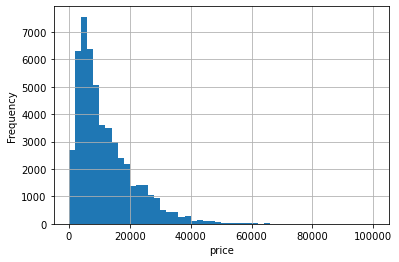

In [219]:
def graficar_hist_columna(df_ingresado,columna,bins_isr=10,rang_inf=df.min(),rang_sup=df.max()):
    print(df_ingresado[columna].describe())
    df[columna].hist(bins=bins_isr,range=(rang_inf,rang_sup))
    plt.xlabel(columna)
    plt.ylabel("Frequency")
    
        
graficar_hist_columna(df,'price',50,0,100000)   


> Podemos apreciar que hay valores atípicos.

<div class="alert alert-danger">
<h1> Comentarios del revisor </h1>
    
No olvides agregar etiquetas al eje `x` y `y`

</div>

<div class="alert alert-info">
<h2>Comentarios del estudiante</h2>
    
listo se corrigio, la funcion tambien devuelve el nombre del eje `x` y `y`
</div>

__Analizar Los años del vehículo cuando el anuncio se colocó:__

count    51525.000000
mean         8.596545
std          6.113648
min          0.000000
25%          4.000000
50%          8.000000
75%         12.000000
max        110.000000
Name: age_of_vehicle, dtype: float64


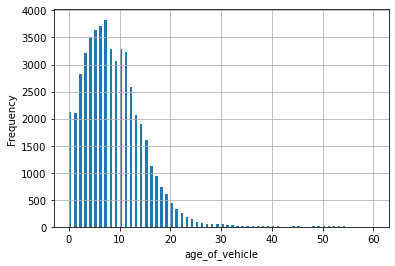

In [220]:
graficar_hist_columna(df,'age_of_vehicle',120,0,60)   

<div class="alert alert-danger">
<h1> Comentarios del revisor </h1>
    
No olvides agregar etiquetas al eje `x` y `y`

</div>

<div class="alert alert-info">
<h2>Comentarios del estudiante</h2>
    
listo se corrigio, la funcion tambien devuelve el nombre del eje `x` y `y`
</div>

__Analizar millaje del vehículo:__

count    5.152300e+04
mean              inf
std               NaN
min      0.000000e+00
25%      1.057143e+04
50%      1.514025e+04
75%      2.250500e+04
max               inf
Name: odometer_avg_year, dtype: float64


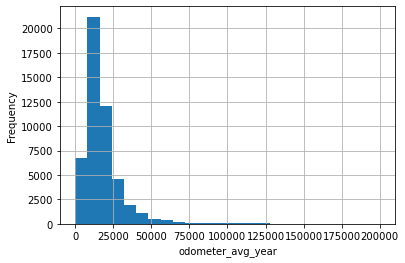

In [221]:
graficar_hist_columna(df,'odometer_avg_year',25,0,200000) 

__Analizar Número de cilindros:__

<div class="alert alert-danger">
<h1> Comentarios del revisor </h1>
    
No olvides agregar etiquetas al eje `x` y `y`

</div>

<div class="alert alert-info">
<h2>Comentarios del estudiante</h2>
    
listo se corrigio, la funcion tambien devuelve el nombre del eje `x` y `y`
</div>

count    51525.000000
mean         6.120873
std          1.654001
min          3.000000
25%          4.000000
50%          6.000000
75%          8.000000
max         12.000000
Name: cylinders, dtype: float64


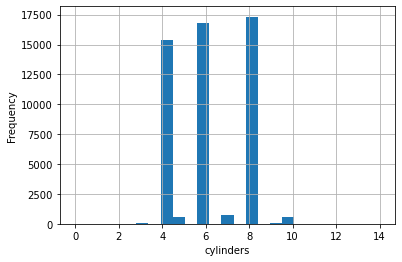

In [222]:
graficar_hist_columna(df,'cylinders',25,0,14) 

<div class="alert alert-danger">
<h1> Comentarios del revisor </h1>
    
No olvides agregar etiquetas al eje `x` y `y`

</div>

<div class="alert alert-info">
<h2>Comentarios del estudiante</h2>
    
listo se corrigio, la funcion tambien devuelve el nombre del eje `x` y `y`
</div>

__Analizar el Estado:__

count    51525.000000
mean         2.637535
std          0.712447
min          0.000000
25%          2.000000
50%          3.000000
75%          3.000000
max          5.000000
Name: condition_code, dtype: float64


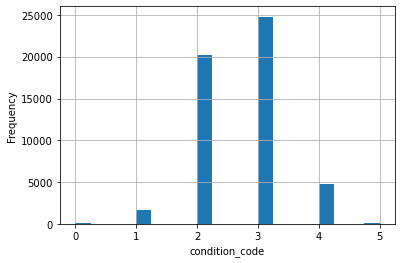

In [223]:
graficar_hist_columna(df,'condition_code',20,0,5) 

<div class="alert alert-danger">
<h1> Comentarios del revisor </h1>
    
No olvides agregar etiquetas al eje `x` y `y`

</div>

<div class="alert alert-info">
<h2>Comentarios del estudiante</h2>
    
listo se corrigio, la funcion tambien devuelve el nombre del eje `x` y `y`
</div>

## Estudiar y tratar valores atípicos

[Con los resultados anteriores, determina qué columnas pueden contener valores atípicos y crea un DataFrame sin esos valores atípicos. Pista: los valores atípicos se pueden identificar tras definir el límite inferior/superior para el rango normal de valores.]

`price`:
+ Para excluir valores extremadamente bajos o altos, se pueden establecer límites de los cuartiles inferiores y superiores (Q1 y Q3 respectivamente).
+ Por ejemplo, los valores fuera del rango (Q1 - 1.5 * IQR, Q3 + 1.5 * IQR) podrían ser considerados atípicos.
+ Donde IQR = Q3 - Q1

> Por eso de limite inferior se usara vehículos cuyos valores esten entre `500` y `65000`

In [224]:
df.groupby('price').mean().sort_values(by='price', ascending=True)


,model_year,cylinders,odometer,is_4wd,days_listed,anio_publicacion,condition_code,age_of_vehicle,odometer_avg_year
price,,,,,,,,,
1,2015.214286,7.729323,51618.050125,0.834586,38.908521,2018.304511,2.996241,3.090226,NaN
3,2005.000000,6.000000,128079.000000,1.000000,22.000000,2018.000000,2.000000,13.000000,9852.230769
5,2011.000000,6.000000,136911.000000,0.000000,5.000000,2018.000000,2.000000,7.000000,19558.714286
6,1999.000000,8.000000,173500.000000,1.000000,53.000000,2019.000000,2.000000,20.000000,8675.000000
9,2010.000000,4.000000,119.000000,1.000000,12.000000,2019.000000,2.000000,9.000000,13.222222
...,...,...,...,...,...,...,...,...,...
145000,2008.000000,8.000000,140000.000000,1.000000,29.000000,2018.000000,4.000000,10.000000,14000.000000
175000,2004.000000,8.000000,149000.000000,1.000000,57.000000,2018.000000,2.000000,14.000000,10642.857143
189000,2014.000000,6.000000,146638.000000,0.000000,53.500000,2018.666667,2.000000,4.666667,31617.900000


#### Graficar limites y atípicos.

Se usara los limetes superiores e inferiores usando:(`Q1 - 1.5 * IQR`, `Q3 + 1.5 * IQR`), donde IQR es : `IQR = Q3 - Q1` , simpre y cuando los limites se encuentren dentro del minimo y maximo de los datos, caso contraio se tomara los minimos y maximos.

In [225]:
### definicion de funcion para calcular limites:

In [226]:
def calculate_column_limits(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lim_inf = max(Q1 - 1.5 * IQR, df[column].min())
    lim_sup = min(Q3 + 1.5 * IQR, df[column].max())
    return lim_inf, lim_sup

### para asignar
##price_lim_inf, price_lim_sup = calculate_column_limits(df, 'price')


In [227]:
### funcion para graficar diagrama de cajas

def graficar_diagrama_cajas_con_limites(df,column):
    lim_inf_caja,lim_sup_caja=calculate_column_limits(df,column)
    print("Atributo "+str(column)+":\n ( Límite inferior: "+str(lim_inf_caja)+" , Límite superior: "+str(lim_sup_caja)+" )")
    plt.ylim(lim_inf_caja,lim_sup_caja)
    df.boxplot(column)
    plt.title("Boxplot of " + column + " con límites")
    
def graficar_diagrama_cajas(df,column):
    df.boxplot(column)
    plt.title("Boxplot of " + column + " sin aplicar límites")
    
    
    


##### Visualizar datos atípicos de `price`: 

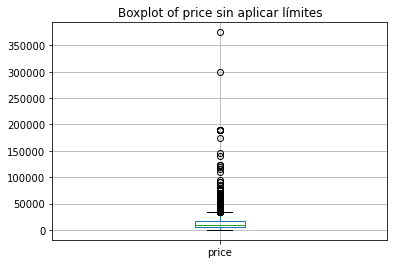

In [228]:
### graficar cajas de Price
graficar_diagrama_cajas(df,'price') 


Atributo price:
 ( Límite inferior: 1 , Límite superior: 34597.5 )


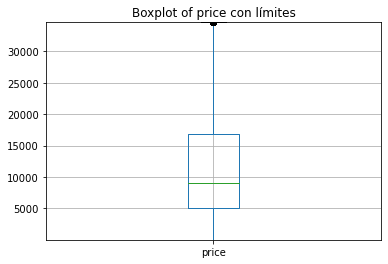

In [229]:
graficar_diagrama_cajas_con_limites(df,'price')

<div class="alert alert-danger">
<h1> Comentarios del revisor </h1>
    
Recuerda no quemas o dejar fijo los valores, deben obtenerse a partir de un calculo. Me refiero a estos dos valores: 
    
`price_lim_sup=65000`
    
`price_lim_inf=500`

</div>

<div class="alert alert-info">
<h2>Comentarios del estudiante</h2>
    
listo se creo Gráfico para que incluya los límites precalculados.
</div>

`age_of_vehicle`:
+ Los valores extremadamente bajos o altos podrían ser considerados atípicos.
+ Por ejemplo, los valores fuera del rango (0, 24) podrían ser considerados atípicos.

> En este caso se aplico la formula para calcular el limite superior `24`

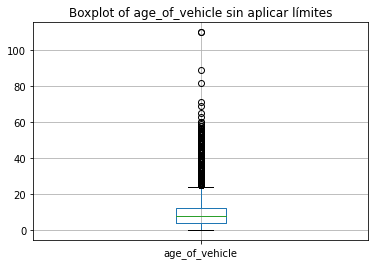

In [230]:
graficar_diagrama_cajas(df,'age_of_vehicle')

Atributo age_of_vehicle:
 ( Límite inferior: 0 , Límite superior: 24.0 )


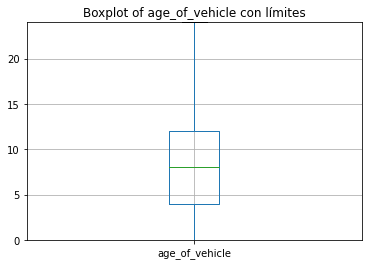

In [231]:
graficar_diagrama_cajas_con_limites(df,'age_of_vehicle')

`odometer_avg_year`:
+ Similar a la columna "price", los valores fuera del rango (Q1 - 1.5 * IQR, Q3 + 1.5 * IQR) podrían ser considerados atípicos.

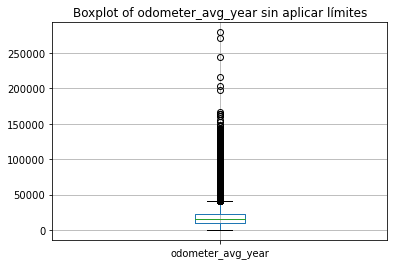

In [232]:
graficar_diagrama_cajas(df,'odometer_avg_year')

Atributo odometer_avg_year:
 ( Límite inferior: 0.0 , Límite superior: 40405.357142857145 )


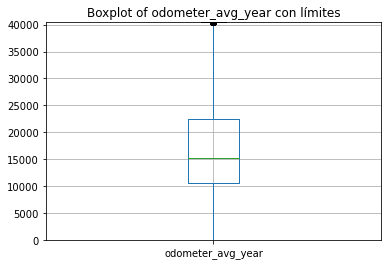

In [233]:
graficar_diagrama_cajas_con_limites(df,'odometer_avg_year')

<div class="alert alert-danger">
<h1> Comentarios del revisor </h1>
    
Recuerda no quemar o dejar fijo los valores, deben obtenerse a partir de un cálculo. No importa si da negativo, no los fijes a mano porque si los datos cambian más arriba, estos valores ya no serán precisos.

</div>

<div class="alert alert-info">
<h2>Comentarios del estudiante</h2>
    
listo se creo Gráfico para que incluya los límites precalculados.
</div>

__Creamos un DataFrame para limpiar de los datos atípicos:__

In [234]:
# Almacena los datos sin valores atípicos en un DataFrame separado

df_sin_atipicos = df.copy()
tamanio_original=len(df_sin_atipicos)
print("Tamanio del DF: "+str(len(df_sin_atipicos)))


Tamanio del DF: 51525


Eliminar Valores atípicos de `price`:

En este caso para el precio se definira un dato quemado como limite inferior de 400 USD , los valores menores a eso no se tendran en cuenta.

#### Creamos una funcion para borrar los valores atípicos por columna.

In [235]:
def remove_column_outliers(df, column, pre_lower_lim=None, pre_upper_lim=None):
    lower_limit, upper_limit = calculate_column_limits(df, column)
    
    if pre_lower_lim is not None:
        lower_limit = pre_lower_lim
    if pre_upper_lim is not None:
        upper_limit = pre_upper_lim
        
    df_return = df.query('@lower_limit <= ' + column + ' <= @upper_limit')
    return df_return



In [236]:
df_sin_atipicos = remove_column_outliers(df_sin_atipicos, 'price',400)


Eliminar Valores atípicos de `age_of_vehicle`:

In [237]:
df_sin_atipicos = remove_column_outliers(df_sin_atipicos,'age_of_vehicle')

Eliminar Valores atípicos de `odometer_avg_year`:

In [238]:
df_sin_atipicos = remove_column_outliers(df_sin_atipicos,'odometer_avg_year')


In [239]:
# Tabla filtrada


print("Tamanio del DF: "+str(len(df_sin_atipicos)))

print("porcentaje de valores que persistieron: "+str((len(df_sin_atipicos)/tamanio_original)*100))

Tamanio del DF: 43843
porcentaje de valores que persistieron: 85.09073265405142


<div class="alert alert-success">
<h1> Comentarios del revisor </h1>
    
Muy buen trabajo con está sección.

</div>

## Estudiar parámetros principales sin valores atípicos

[Utiliza los datos filtrados para crear nuevos histogramas. Compáralos con los histogramas anteriores (aquellos con los valores atípicos incluidos). Saca conclusiones de cada histograma.]

#### `price`
Comparacion de los datos originales vs los datos limpios de la columna `price`.

count     51525.000000
mean      12132.464920
std       10040.803015
min           1.000000
25%        5000.000000
50%        9000.000000
75%       16839.000000
max      375000.000000
Name: price, dtype: float64 

count    43843.000000
mean     10728.459891
std       7338.453437
min        400.000000
25%       4995.000000
50%       8500.000000
75%      14990.000000
max      34595.000000
Name: price, dtype: float64 



Text(0, 0.5, 'Frequency')

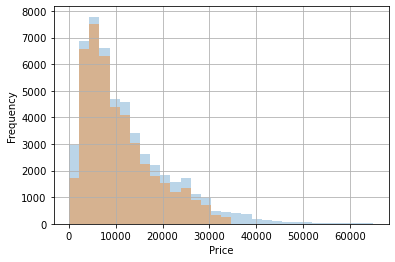

In [240]:
print(df['price'].describe(),'\n')
print(df_sin_atipicos['price'].describe(),'\n')

df['price'].hist(bins=30,range=(0,65000),alpha=0.3)
df_sin_atipicos['price'].hist(bins=30,range=(0,65000),alpha=0.4)
plt.xlabel('Price')
plt.ylabel("Frequency")

#### `age_of_vehicle`

Comparacion de los datos originales vs los datos limpios de la columna `age_of_vehicle`.

count    51525.000000
mean         8.596545
std          6.113648
min          0.000000
25%          4.000000
50%          8.000000
75%         12.000000
max        110.000000
Name: age_of_vehicle, dtype: float64 

count    43843.000000
mean         9.047328
std          4.652170
min          1.000000
25%          5.000000
50%          9.000000
75%         12.000000
max         22.000000
Name: age_of_vehicle, dtype: float64 



Text(0, 0.5, 'Frequency')

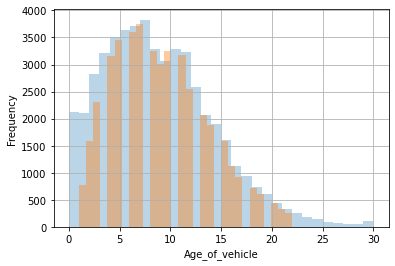

In [241]:
#age_of_vehicle
print(df['age_of_vehicle'].describe(),'\n')
print(df_sin_atipicos['age_of_vehicle'].describe(),'\n')

df['age_of_vehicle'].hist(bins=30,range=(0,30),alpha=0.3)
df_sin_atipicos['age_of_vehicle'].hist(bins=30,alpha=0.4)
plt.xlabel('Age_of_vehicle')
plt.ylabel("Frequency")



#### `odometer_avg_year`:
Comparacion de los datos originales vs los datos limpios de la columna `odometer_avg_year`.

count    5.152300e+04
mean              inf
std               NaN
min      0.000000e+00
25%      1.057143e+04
50%      1.514025e+04
75%      2.250500e+04
max               inf
Name: odometer_avg_year, dtype: float64 

count    43843.000000
mean     15505.875696
std       7460.452763
min          0.000000
25%      10365.151515
50%      14319.090909
75%      19600.000000
max      38655.333333
Name: odometer_avg_year, dtype: float64 



Text(0, 0.5, 'Frequency')

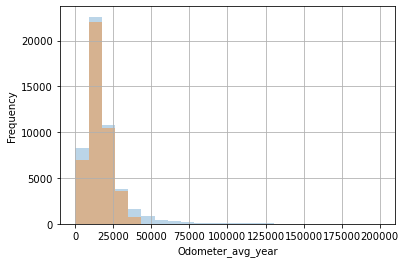

In [242]:
#odometer_avg_year
print(df['odometer_avg_year'].describe(),'\n')
print(df_sin_atipicos['odometer_avg_year'].describe(),'\n')
df['odometer_avg_year'].hist(bins=23,range=(0,200000),alpha=0.3)
df_sin_atipicos['odometer_avg_year'].hist(bins=23,range=(0,200000),alpha=0.4)
plt.xlabel('Odometer_avg_year')
plt.ylabel("Frequency")


__Corregir índices:__

In [243]:
print(str(len(df_sin_atipicos['days_listed']))+'\n')

print(df_sin_atipicos['days_listed'].tail())

###Actualizar indices.
df_sin_atipicos = df_sin_atipicos.reset_index(drop=True)

print(df_sin_atipicos['days_listed'].tail())

43843

51520    37
51521    22
51522    32
51523    71
51524    10
Name: days_listed, dtype: int64
43838    37
43839    22
43840    32
43841    71
43842    10
Name: days_listed, dtype: int64


## Periodo de colocación de los anuncios

[Estudia cuántos días los anuncios fueron mostrados (`days_listed`). Calcula la media y la mediana. Describe el periodo de colocación habitual de un anuncio. Determina cuándo se eliminaron rápidamente los anuncios y cuándo son publicados por un tiempo anormalmente largo.]

In [244]:
df_sin_atipicos['days_listed'].describe()

count    43843.000000
mean        39.570422
std         28.255248
min          0.000000
25%         19.000000
50%         33.000000
75%         53.000000
max        271.000000
Name: days_listed, dtype: float64

Text(0.5, 1.0, 'Gráfico de días de la publicación')

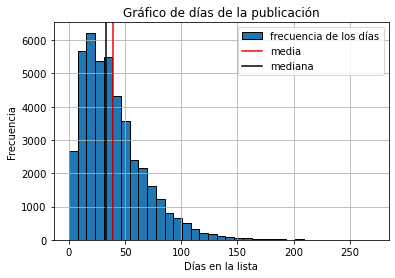

In [245]:
df_sin_atipicos['days_listed'].hist(bins=35, label='frecuencia de los días', edgecolor='black')
plt.axvline(df_sin_atipicos['days_listed'].mean(), color='red', label='media')
plt.axvline(df_sin_atipicos['days_listed'].median(), color='black', label='mediana')
plt.xlabel("Días en la lista")
plt.ylabel("Frecuencia")
plt.legend()
plt.title('Gráfico de días de la publicación')


<div class="alert alert-danger">
<h1> Comentarios del revisor </h1>
    
No olvides agregar etiquetas al eje `x` y `y`  en las 4 gráficas de arriba.

</div>

<div class="alert alert-info">
<h2>Comentarios del estudiante</h2>
    
Se corrigió todas las observaciones.
</div>

> Podemos Observar que el pico se encuentra entre 5 y 40 dias de su publicación.

In [246]:
df_sin_atipicos['mes_publicacion'].value_counts()

March        4025
January      3925
October      3871
December     3803
May          3792
August       3764
July         3743
September    3730
November     3670
February     3516
June         3509
April        2495
Name: mes_publicacion, dtype: int64

Text(0.5, 1.0, 'Gráfico de frecuencia del mese de publicación')

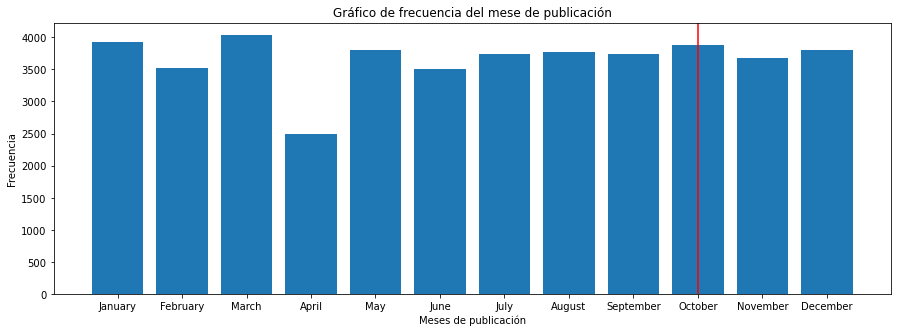

In [247]:
# Create a histogram for the 'mes_publicacion' column

month_counts = df_sin_atipicos['mes_publicacion'].value_counts()
month_names = ["January", "February", "March", "April", "May", "June", "July", "August", "September", "October", "November", "December"]
month_counts = month_counts.reindex(month_names)

fig = plt.figure(figsize=(15,5))
plt.bar(month_names, month_counts)
plt.xlabel('Meses de publicación')
plt.ylabel('Frecuencia')
plt.axvline(x="October", color='red', label='Más frecuente')
plt.title('Gráfico de frecuencia del mese de publicación')



> Observamos que el mes mas frecuente es el de octubre, y el menos frecuente es el de Abril.

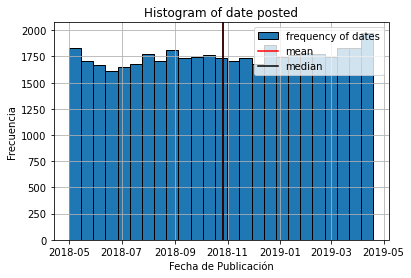

In [248]:
df_sin_atipicos['date_posted'].hist(bins=25, label='frequency of dates', edgecolor='black')
plt.axvline(df_sin_atipicos['date_posted'].mean(), color='red', label='mean')
plt.axvline(df_sin_atipicos['date_posted'].median(), color='black', label='median')
plt.legend()
plt.xlabel("Fecha de Publicación")
plt.ylabel("Frecuencia")
plt.title('Histogram of date posted')
plt.show()


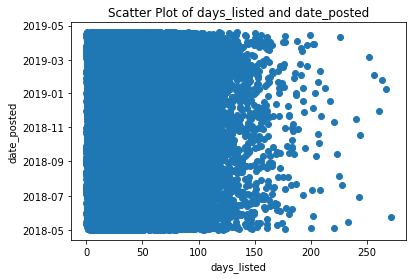

In [249]:

plt.scatter(df_sin_atipicos['days_listed'], df_sin_atipicos['date_posted'])
plt.xlabel('days_listed')
plt.ylabel('date_posted')
plt.title('Scatter Plot of days_listed and date_posted')
plt.show()


>Podemos Observar que no hay correlacion entre los dias de lista y la fecha de la publicación del Vehiculo.

<div class="alert alert-success">
<h1> Comentarios del revisor </h1>
    
Muy buen trabajo!
</div>

## Precio promedio por cada tipo de vehículo

[Analiza el número de anuncios y el precio promedio para cada tipo de vehículo. Traza un gráfico mostrando la dependencia de la cantidad de anuncios en cada tipo de vehículo. Selecciona los dos tipos con un mayor número de anuncios.]

In [250]:
len(df_sin_atipicos['type'].unique())

13

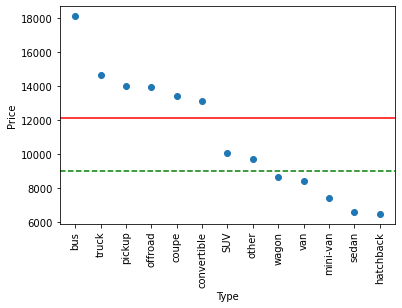

In [251]:
# Group the dataframe by 'type' and calculate the mean of 'price'
grouped_type_vs_price = df_sin_atipicos.groupby(['type'])['price'].mean().reset_index()

# Sort the grouped data by 'price' in descending order
grouped_type_vs_price = grouped_type_vs_price.sort_values(by='price', ascending=False)

# Select the top 'n' models
n = 13 # you can set this value to the desired number of models to plot
top_types_price = grouped_type_vs_price.head(n)

# Create a scatter plot using matplotlib
plt.scatter(top_types_price['type'], top_types_price['price'])


# Add labels to the x and y axis
plt.xlabel('Type')
plt.ylabel('Price')

# Rotate x-axis labels to make them easier to read
plt.xticks(rotation=90)

plt.axhline(df['price'].mean(), color='red', linestyle='-')
plt.axhline(df['price'].median(), color='green', linestyle='--')

# Show the plot
plt.show()


> Podemos ver que si hay una correlacion entre el precio y el tipo del vehiculo.

In [252]:
grouped_type = df_sin_atipicos['type'].value_counts().reset_index()
grouped_type.columns = ['type', 'value_count']

grouped_type

,type,value_count
0,SUV,10847
1,sedan,10830
2,truck,9999
3,pickup,5713
4,coupe,1795
5,wagon,1449
6,mini-van,1058
7,hatchback,922
8,van,519
9,convertible,310


In [253]:
modelos_interes = df_sin_atipicos.query('type in ("SUV", "sedan", "pickup", "truck")')

Text(0.5, 1.0, '4 Tipos de carro más comunes')

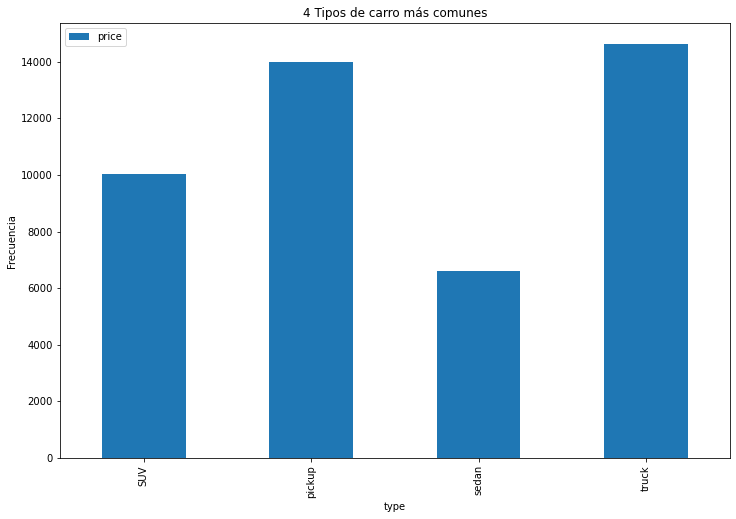

In [254]:

pivote_modelo = pd.pivot_table(modelos_interes, values='price', index='type', aggfunc='mean')
pivote_modelo.plot.bar(figsize=(12,8))
plt.ylabel("Frecuencia")
plt.title("4 Tipos de carro más comunes")



<div class="alert alert-danger">
<h1> Comentarios del revisor </h1>
    
Falta una sección de seleccionar los dos vehículos con más publicaciones y hacer un pequeño análisis alrededor.

</div>

<div class="alert alert-info">
<h2>Comentarios del estudiante</h2>
    
listo se creo Gráfico de los 4 vehiculos más populares.
</div>

Vamos a ver si en un tipo de vehiculo el promedio del odometro influye en el precio.

,odometer_avg_year,price
type,,
SUV,15511.086931,10050.458007
pickup,15556.765552,13977.859618
sedan,15688.834032,6605.913019
truck,15871.166112,14634.606561


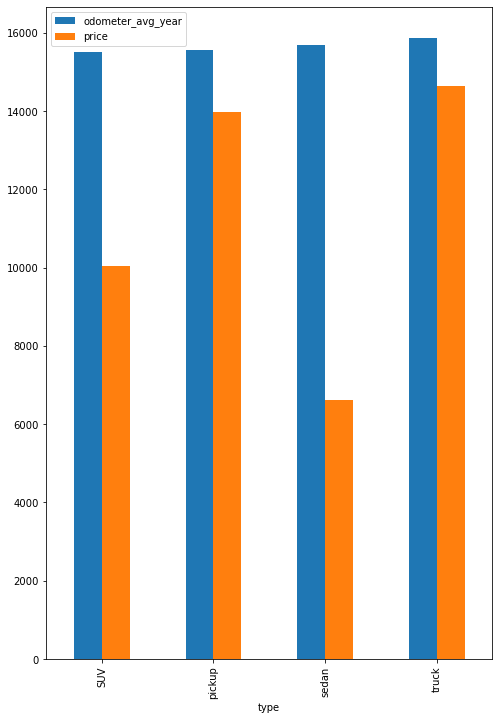

In [255]:

pivote_modelo_count = pd.pivot_table(modelos_interes, values=['odometer_avg_year','price'], index='type', aggfunc='mean')
pivote_modelo_count.plot(kind='bar', figsize=(8, 12))

pivote_modelo_count

## Factores de precio

Ahora vamos a ver si existe relacion entre los factores de los vehículos , especialmente con el precio. Para esto se usara las correlaciones.

In [256]:
corr_1 = df_sin_atipicos.corr()

corr_1

,price,model_year,cylinders,odometer,is_4wd,days_listed,anio_publicacion,condition_code,age_of_vehicle,odometer_avg_year
price,1.000000,0.524350,0.358062,-0.433645,0.359073,-0.001957,0.034330,0.206638,-0.521234,0.202256
model_year,0.524350,1.000000,-0.184608,-0.527049,-0.044650,-0.000877,0.056166,0.255517,-0.994989,0.550895
cylinders,0.358062,-0.184608,1.000000,0.148557,0.410344,0.003227,-0.004985,-0.083838,0.184222,-0.052424
odometer,-0.433645,-0.527049,0.148557,1.000000,0.086110,0.004477,-0.023980,-0.251590,0.524971,0.253491
is_4wd,0.359073,-0.044650,0.410344,0.086110,1.000000,0.003430,-0.001251,-0.001013,0.044552,0.042150
days_listed,-0.001957,-0.000877,0.003227,0.004477,0.003430,1.000000,0.009870,0.001890,0.001866,0.001467
anio_publicacion,0.034330,0.056166,-0.004985,-0.023980,-0.001251,0.009870,1.000000,0.015275,0.043941,-0.094611
condition_code,0.206638,0.255517,-0.083838,-0.251590,-0.001013,0.001890,0.015275,1.000000,-0.254144,0.050282
age_of_vehicle,-0.521234,-0.994989,0.184222,0.524971,0.044552,0.001866,0.043941,-0.254144,1.000000,-0.560708
odometer_avg_year,0.202256,0.550895,-0.052424,0.253491,0.042150,0.001467,-0.094611,0.050282,-0.560708,1.000000


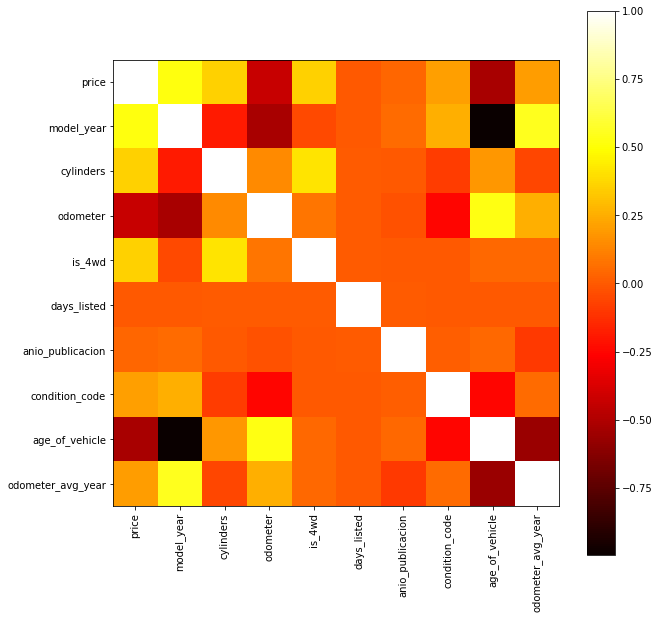

In [257]:


# Plot the correlation matrix using a heatmap
plt.figure(figsize=(10, 10))
plt.imshow(corr_1, cmap='hot', interpolation='nearest')
plt.xticks(range(len(corr_1)), corr_1.columns, rotation=90)
plt.yticks(range(len(corr_1)), corr_1.columns)
plt.colorbar()
plt.show()



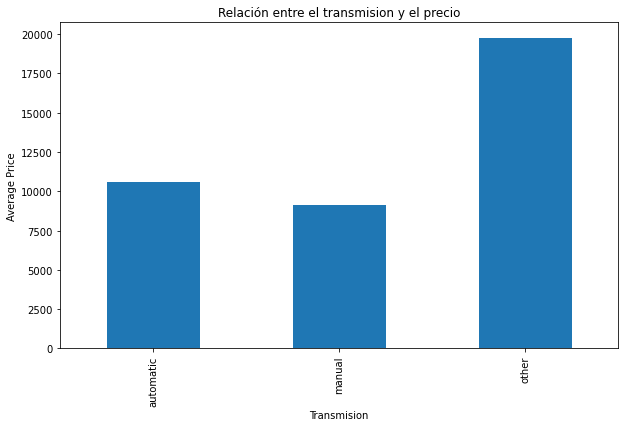

In [258]:
# Create box plots to visualize the relationship between price and categorical variables (transmission type and color)
df_sin_atipicos['transmission'] = df_sin_atipicos['transmission'].astype(str)
df_sin_atipicos.groupby('transmission').mean()['price'].plot(kind='bar', figsize=(10, 6))
plt.xlabel('Transmision')
plt.ylabel('Average Price')
plt.title('Relación entre el transmision y el precio')
plt.show()

> Observamos que se puede ver una leve relación entre la transmision y el precio.

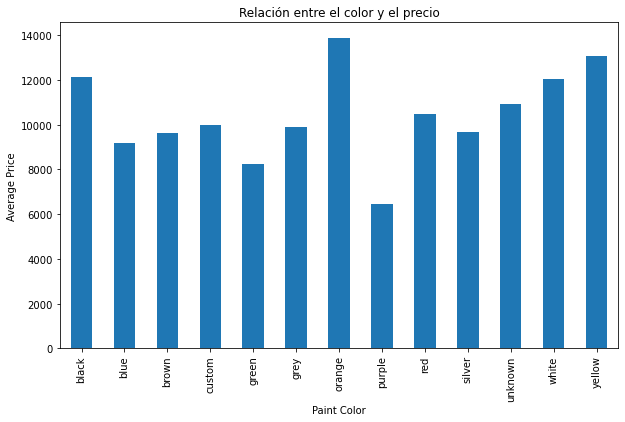

In [259]:

df_sin_atipicos['paint_color'] = df_sin_atipicos['paint_color'].astype(str)
df_sin_atipicos.groupby('paint_color').mean()['price'].plot(kind='bar', figsize=(10, 6))
plt.xlabel('Paint Color')
plt.ylabel('Average Price')
plt.title('Relación entre el color y el precio')
plt.show()


> Podemos ver que no existe relación entre el color del vehiculo con el precio, tiene sentido.

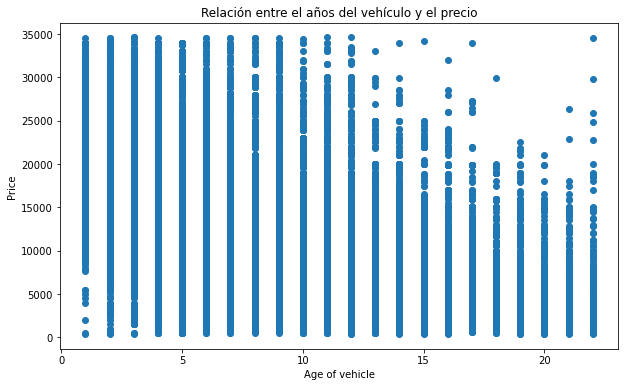

In [260]:
# Create scatter plots to visualize the relationship between price and numerical variables (age, odometer, condition code)
plt.figure(figsize=(10, 6))
plt.scatter(df_sin_atipicos['age_of_vehicle'], df_sin_atipicos['price'])
plt.xlabel('Age of vehicle')
plt.title('Relación entre el años del vehículo y el precio')
plt.ylabel('Price')
plt.show()


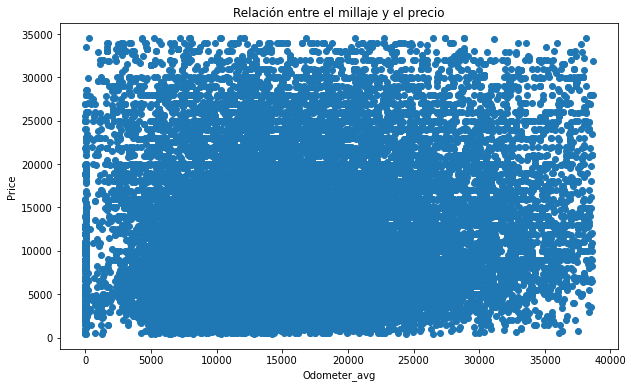

In [261]:
plt.figure(figsize=(10, 6))
plt.scatter(df_sin_atipicos['odometer_avg_year'], df_sin_atipicos['price'])
plt.xlabel('Odometer_avg')
plt.ylabel('Price')
plt.title('Relación entre el millaje y el precio')
plt.show()



> Podemos ver que el promedio del millaje no tiene una relación con el precio. Lo que tiene sentido.

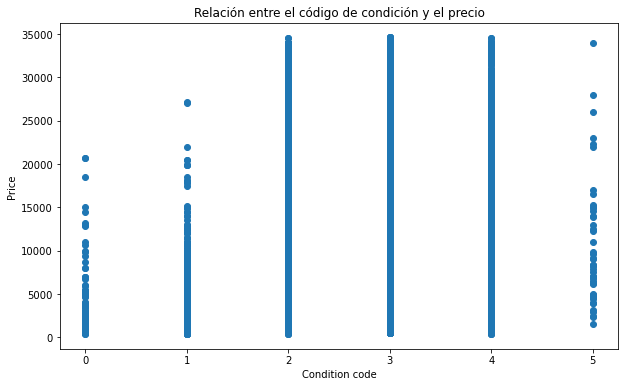

In [262]:
plt.figure(figsize=(10, 6))
plt.scatter(df_sin_atipicos['condition_code'], df_sin_atipicos['price'])
plt.xlabel('Condition code')
plt.ylabel('Price')
plt.title('Relación entre el código de condición y el precio')
plt.show()

>Observamos que existe correlación proporcional entre el precio y la condicion del vehículo.

<div class="alert alert-success">
<h1> Comentarios del revisor </h1>
    
Excelente sección de los factores de precio. 
</div>

### Correlación de datos Conclusión 
La correlación más fuerte con el precio es la edad del vehículo con una correlación de -0.624352. Esto significa que a medida que la edad del vehículo aumenta, su precio disminuye. El millaje también tiene un impacto moderado en el precio con una correlación de -0.452300, lo que significa que a medida que el millaje aumenta, el precio disminuye. La condición del vehículo también parece tener un impacto moderado en el precio con una correlación de 0.249689, lo que significa que a medida que la condición mejora, el precio aumenta.

Sin embargo, el tipo de transmisión y el color no tienen una correlación significativa con el precio, con correlaciones de 0.009107 y -0.002485 respectivamente. Para confirmar estos resultados, es recomendable trazar gráficos de caja y bigotes y gráficos de dispersión para estas variables categóricas y continuas respectivamente.

## Conclusión general

__Etapa de Tratamiento:__

Se concluye que los datos originales estaban con 3 inconsistencias:
+ Datos ausente.
+ Tipos de datos incorrectos.
+ Datos atípicos.

Por lo que se corrigio antes de efectuar el análisis.

__Etapa de Análisis:__

Durante la etapa de análisis respecto a los factores que influyen en el de `precio` son: 
1. Forma Proporcional:
    + `condicion del vehiculo` (leve)
    + `año del modelo´
    + `modelo`
    + `cylindraje` (leve)
    + `typo` (leve)
2. Forma Inversamente Proporcional
    + `edad del vehiculo` (fuerte)
    + `odometer_avg_year` (leve)
3. No existe Relación:
    + `pintura`
    + `fecha de publicación`


Una recomendación importante podría ser que, según el análisis, la edad del vehículo y el promedio de kilómetros recorridos al año son factores que influyen fuertemente en el precio. Esto podría ser una oportunidad para la compañía para enfocarse en la compra y venta de vehículos más jóvenes y con un uso moderado, con el fin de ofrecer un mayor valor a sus clientes y, por lo tanto, mejorar sus márgenes de ganancia.

<div class="alert alert-danger">
<h1> Comentarios del revisor </h1>
    
Muy buen proyecto en general, dejé un par de correcciones importantes, seguramento no vas a tener problemas para corregirlo. Recuerda expandir un poco más las conclusiones, que son correctas pero puedes agregar un poco más de texto de posibles insights importantes del informe y que puedan ser accionables para la compañia.
</div>

<div class="alert alert-info">
<h2>Comentarios del estudiante</h2>
    
Se corrigió todas las observaciones.
</div>